In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.98):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
df = pd.read_csv("EXTENDED_1.csv",encoding="latin-1")

cols = ["Favorite food names",
              "Sleep duration", 
              "Do you start your day by planning(y/n)",
              "Hardworking"]

dataset = df[cols].copy()

In [7]:
dataset = dataset.dropna() # clear missing values rows

In [9]:
dataset['Favorite food names'] = (dataset['Favorite food names'] == 'Fast food').astype(float)
dataset['Do you start your day by planning(y/n)'] = (dataset['Do you start your day by planning(y/n)'] == 'Yes').astype(float)

dataset.head()

,Favorite food names,Sleep duration,Do you start your day by planning(y/n),Hardworking
1,1.0,8.0,0.0,0.0
2,1.0,8.0,1.0,1.0
3,0.0,6.0,1.0,1.0
4,0.0,8.0,0.0,0.0
5,1.0,6.0,0.0,0.0


In [10]:
x = dataset.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset = pd.DataFrame(x_scaled,columns=cols)

dataset.head()

,Favorite food names,Sleep duration,Do you start your day by planning(y/n),Hardworking
0,1.0,0.6,0.0,0.0
1,1.0,0.6,1.0,1.0
2,0.0,0.2,1.0,1.0
3,0.0,0.6,0.0,0.0
4,1.0,0.2,0.0,0.0


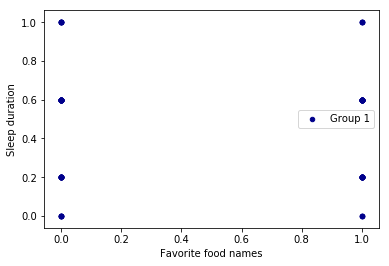

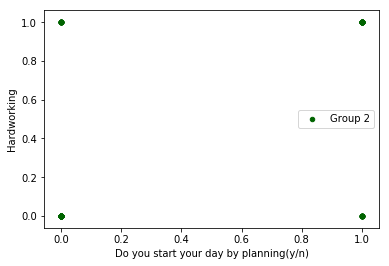

In [11]:
ax = dataset.plot.scatter(x='Favorite food names', y='Sleep duration', color='DarkBlue', label='Group 1')

dataset.plot.scatter(x='Do you start your day by planning(y/n)', y='Hardworking', color='DarkGreen', label='Group 2')

# dataset.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax2)

In [12]:
train_dataset = dataset.sample(frac=0.9,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop("Hardworking")
test_labels = test_dataset.pop("Hardworking")

In [13]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1, activation=tf.nn.sigmoid), # binary class => Hardworking or lazy
    ])
    
    model.compile(optimizer= tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [14]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary() # description of the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [16]:
callbacks = myCallback()

history = model.fit(train_dataset,train_labels,epochs=20,validation_split=0.1,callbacks=[callbacks])

Train on 83 samples, validate on 10 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
83/83 [==============================] - 0s 3ms/sample - loss: 0.7051 - acc: 0.4940 - val_loss: 0.6711 - val_acc: 0.6000
Epoch 2/20
83/83 [==============================] - 0s 156us/sample - loss: 0.6825 - acc: 0.5181 - val_loss: 0.6603 - val_acc: 0.8000
Epoch 3/20
83/83 [==============================] - 0s 168us/sample - loss: 0.6655 - acc: 0.7831 - val_loss: 0.6494 - val_acc: 0.8000
Epoch 4/20
83/83 [==============================] - 0s 144us/sample - loss: 0.6489 - acc: 0.7831 - val_loss: 0.6377 - val_acc: 0.8000
Epoch 5/20
83/83 [==============================] - 0s 156us/sample - loss: 0.6364 - acc: 0.7952 - val_loss: 0.6265 - val_acc: 0.9000
Epoch 6/20
83/83 [==============================] - 0s 156us/sample - loss: 0.6224 - acc: 0.7952 - val_loss: 0.6133 - val_acc: 0.9000
Epoch 7/20
83/83 [==============================] - 0s 192us/sample - loss: 0.6099 - acc: 0.7952 - val_los

In [17]:
eval_model = model.evaluate(test_dataset,test_labels)

print('Loss:',eval_model[0],' Accuracy:',eval_model[1])

10/10 [==============================] - 0s 200us/sample - loss: 0.4590 - acc: 0.8000
Loss: 0.45900893211364746  Accuracy: 0.8


In [18]:
test_predictions = model.predict(test_dataset)
test_predictions = (test_predictions > 0.5)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictions)
print(cm)

# Confusion matrix for binary classification
# [[TNeg FPos]
#  [FNeg TPos]]

[[7 0]
 [2 1]]


In [29]:
cols = ['Sleep duration','CGPA','Number of programming hours spent per day']
datasetToEval = df[cols]
datasetToEval = datasetToEval.dropna()

datasetToEval.head()

,Sleep duration,CGPA,Number of programming hours spent per day
1,8.0,3.48,3.0
2,8.0,2.90,0.3
3,6.0,3.33,1.0
4,8.0,3.72,0.5
5,6.0,3.43,8.0


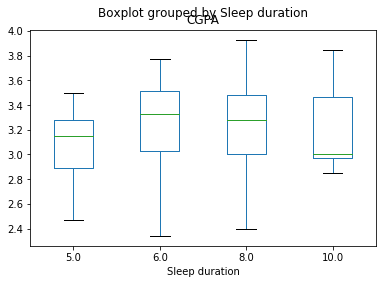

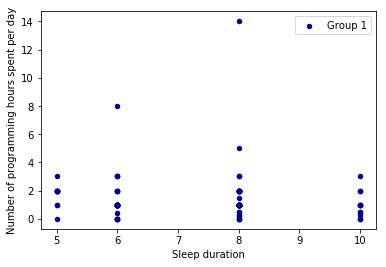

In [30]:
datasetToEval.boxplot(by='Sleep duration', column=['CGPA'], grid= False)
datasetToEval.plot.scatter(x='Sleep duration', y='Number of programming hours spent per day', color='DarkBlue', label='Group 1')